In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

C:\Users\Shihab Uddin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
columns = data.columns.tolist()

In [5]:
x = data[columns[:-1]]
y = data[columns[-1]]

In [6]:
x.shape,y.shape

((284807, 30), (284807,))

In [7]:
count_values = pd.value_counts(data['Class'])

Text(0, 0.5, 'CLass')

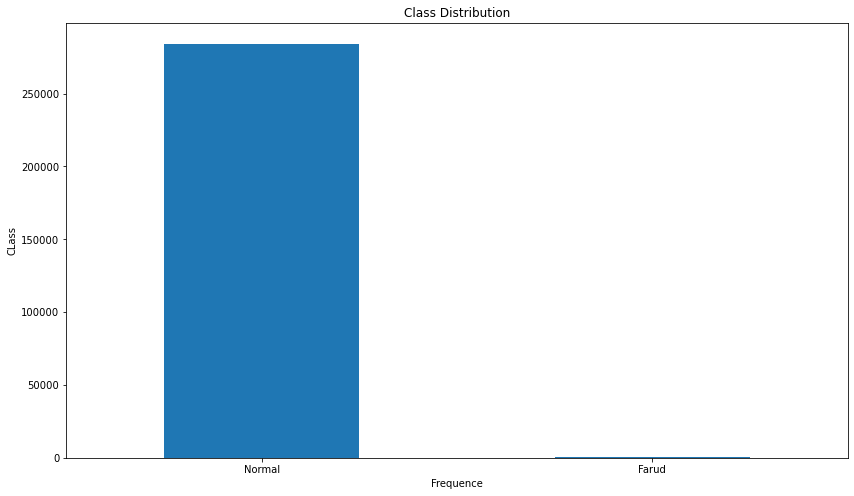

In [8]:
LABELS=['Normal','Farud']
count_values.plot(kind='bar',rot=0)
plt.title("Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Frequence")
plt.ylabel("CLass")

In [9]:
from imblearn.combine import SMOTETomek

In [12]:
smk = SMOTETomek(random_state=42)
x_res,y_res = smk.fit_sample(x,y)

In [13]:
x_res.shape,y_res.shape

((567562, 30), (567562,))

## Method 2

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
ros = RandomOverSampler(sampling_strategy=1)
x_test_res,y_train_res = ros.fit_sample(x,y)

In [25]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [26]:
x_test_res['Class'] = y_train_res

In [27]:
newData = x_test_res

In [28]:
over_sample_count = pd.value_counts(newData['Class'])

Text(0, 0.5, 'CLass')

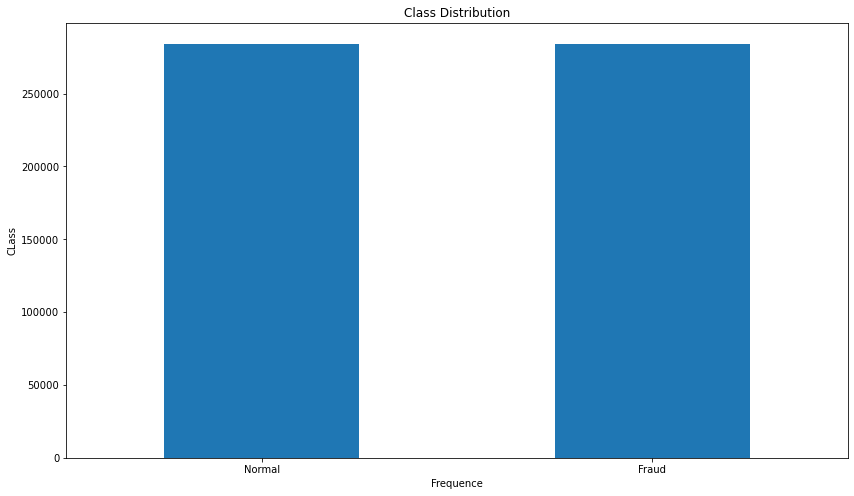

In [29]:
LABELS = ['Normal','Fraud']
over_sample_count.plot(kind='bar',rot=0)
plt.title("Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Frequence")
plt.ylabel("CLass")